Website for this homework is [here](https://apmonitor.com/do/index.php/Main/DynamicEstimation).



# Example 3
Estimate the parameter k in the exponential decay equation:

$$ \frac{dx}{dt} = -kx $$

by minimizing the error between the predicted and measured x values. The x values are measured at the following time intervals.
 
 ```python
 t_data = [0, 0.1, 0.2, 0.4, 0.8, 1]
x_data = [2.0,  1.6,  1.2, 0.7,  0.3,  0.15]
```
Use an initial condition of $x=2$ that matches the data. Verify the solution of $x$ with the analytic solution $x(t) = 2e^{-kt}$.


## Using GEKKO

In [60]:
import numpy as np
from gekko import GEKKO


t_data = np.array([0, 0.1, 0.2, 0.4, 0.8, 1])
x_data = np.array([2.0,  1.6,  1.2, 0.7,  0.3,  0.15])
# x_data_test = np.ones(6)*2

m = GEKKO()
m.time = t_data

#variables
x = m.CV(value=x_data) #in this case, x is the controlled variable because we have it's values and are trying to estimate k
x.FSTATUS = 1 #use x as feedback 
k = m.FV()
k.STATUS = 1 #let gekko change k
m.Equation(x.dt() == -k * x)

#objective function to minimize
m.Minimize(np.sqrt(np.sum((np.array(x.value)-x_data)**2)))

m.options.IMODE = 5 #dynamics simultaneous estimation
m.options.NODES = 10 #first solution with 3 nodes didn't fit very well.

m.solve()


apm 66.219.236.170_gk_model25 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            2
   Intermediates:            0
   Connections  :            0
   Equations    :            2
   Residuals    :            2
 
 ________________________________________________
 p(1).n(1).Eqn(2)
 0 = 0.0
 ________________________________________________
 ________________________________________________
 p(1).n(2).Eqn(2)
 0 = 0.0
 ________________________________________________
 ________________________________________________
 p(1).n(3).Eqn(2)
 0 = 0.0
 ________________________________________________
 ________________________________________________
 p(1).n(4).Eqn(2)
 0 = 0.0
 ___________________________

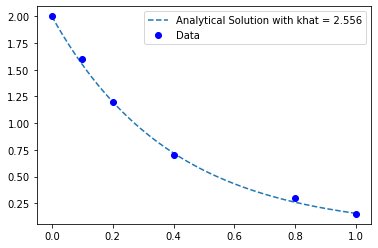

In [61]:
import matplotlib.pyplot as plt
khat = k.value[0]

#exact solution
t = np.arange(0,1,.001)
x_analytical = 2*np.exp(-khat*t)

plt.figure()
plt.plot(t, x_analytical, '--', label=f"Analytical Solution with khat = {np.round(khat,3)}")
plt.plot(t_data, x_data, 'bo', label="Data")
plt.legend()

## Using Scipy

```python
#note that by default, GEKKO uses IPOPT a FORTRAN optmization library. I'll see what scipy can do.

#this is just a rough sketch of how to do this. There are lots of examples online of library and such that do this better. 

def objective(k):
    x =  #solve ode here
    return np.linalg.norm(x - x_data)

k0 = 0.0

scipy.minimize(objective, k0)
```

# Example 4


Estimate the parameters $a$, $b$, $c$, and $d$ in the ode:

$$ \frac{d^3x}{dt^3} = a\frac{d^2x}{dt^2} + b\frac{dx}{dt} + cx + d$$ 

by minimizing the error between the predicted and measured 
x values. The x values are measured at the following time intervals.

```python
t_data = [0,0.1,0.2,0.4,0.8,1,1.5,2,2.5,3,3.5,4]
x_data = [2.0,1.6,1.2,0.7,0.3,0.15,0.1,0.05,0.03,0.02,0.015,0.01]
```
Use an IC of $x=2$ that matches the data. Create new states $y = \frac{dx}{dt}$ and $z = \frac{dy}{dt}$ for the higher order derivatives. 


\begin{align*}
\frac{dx}{dt} &= y \\
\frac{dy}{dt} &= z \\
\frac{dz}{dt} &= az + by + cx + d
\end{align*}




In [66]:
t_data = [0,0.1,0.2,0.4,0.8,1,1.5,2,2.5,3,3.5,4]
x_data = [2.0,1.6,1.2,0.7,0.3,0.15,0.1,0.05,0.03,0.02,0.015,0.01]

m = GEKKO()
m.time=t_data

a = m.FV()
b = m.FV()
c = m.FV()
d = m.FV()

#let gekko change a,b,c,d
a.STATUS=1
b.STATUS=1
c.STATUS=1
d.STATUS=1

#ode
x = m.CV(value=x_data)

#do requested variable subs
y = m.Var(0)
z = m.Var(0)

m.Equation(y == x.dt())
m.Equation(z == y.dt())
m.Equation(z.dt() == a*z + b*y + c*x + d)

#objective function to minimize, error between model x prediction and data
#NOTE: this isn't needed, but what does GEKKO default to as an objective if not specified?
# m.Minimize(np.linalg.norm(np.array(x.value) - np.array(x_data)))

m.options.IMODE = 5 #dynamics simultaneous estimation

m.solve()

apm 66.219.236.170_gk_model28 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            7
   Intermediates:            0
   Connections  :            0
   Equations    :            4
   Residuals    :            4
 
 ________________________________________________
 p(1).n(1).Eqn(4)
 0 = 0.0
 ________________________________________________
 ________________________________________________
 p(1).n(2).Eqn(4)
 0 = 0.0
 ________________________________________________
 ________________________________________________
 p(2).n(1).Eqn(4)
 0 = 0.0
 ________________________________________________
 ________________________________________________
 p(2).n(2).Eqn(4)
 0 = 0.0
 ___________________________

In [69]:
print(f"a*:{a.value[0]}\nb*:{b.value[0]}\nc*:{c.value[0]}\nd*:{d.value[0]}")

a*:-73.967776846
b*:-2814.871766
c*:-9224.924224
d*:164.56571515


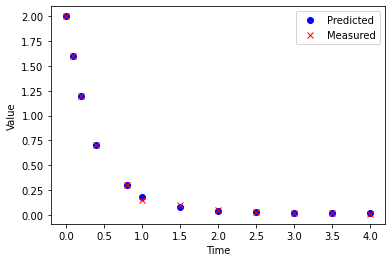

In [65]:
plt.plot(m.time,x.value,'bo',label='Predicted')
plt.plot(m.time,x_data,'rx',label='Measured')
plt.legend()
plt.xlabel('Time'), plt.ylabel('Value')

